In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
clientesdados = pd.read_csv("dados_clientes.csv")
ofertadados = pd.read_csv("portfolio_ofertas - portfolio_ofertas.csv")
eventosdados = pd.read_csv("eventos_ofertas.csv",encoding="latin1")

clientesdados.drop_duplicates(inplace=True)
clientesdados["genero"].value_counts() #como temos dados nulos, podemos tanto remover ou substituir pela moda.
#vamos tratar pela moda

moda_genero = clientesdados["genero"].mode()[0]
clientesdados.fillna({"genero": moda_genero}, inplace=True)



clientesdados["renda_anual"] = pd.to_numeric(clientesdados["renda_anual"],errors="coerce") #converter para numerico
media = clientesdados["renda_anual"].mean() #media

clientesdados.loc[clientesdados["renda_anual"].isnull(),"renda_anual"]= media #vamos tratar os dados nulos para mediana
clientesdados["renda_anual"]=clientesdados["renda_anual"].round(2) #formatar para melhorar a visibilidade

clientesdados["membro_desde"] = pd.to_datetime(clientesdados["membro_desde"], format="%Y%m%d", errors="coerce") #arrumamos a formatacao da coluna membro_desde para date


cliente = clientesdados

cliente.rename(columns={"id": "cliente"}, inplace=True)

ofertas = ofertadados
ofertas.rename(columns={"id" : "id_oferta"},inplace=True)

evento = eventosdados

evento = evento.merge(ofertas, on = "id_oferta", how="left")
cliente=cliente.merge(evento, on ="cliente",how="left")


cliente["canal"]=cliente["canal"].astype(str)




In [10]:
analisejovensemembrosnovos = cliente.loc[((cliente["renda_anual"]<=50000) & (cliente["idade"]<=30)) | (cliente["membro_desde"]>= pd.to_datetime("2017-01-01"))]
ofertaenv = analisejovensemembrosnovos.loc[analisejovensemembrosnovos["tipo_evento"] == "oferta recebida"]
ofertaconcluida = analisejovensemembrosnovos.loc[analisejovensemembrosnovos["tipo_evento"] == "oferta concluída"]
ofertavisualizada = analisejovensemembrosnovos.loc[analisejovensemembrosnovos["tipo_evento"]== "oferta visualizada"]

canaiscomunicacaojovens = analisejovensemembrosnovos["canal"].dropna()
canaiscomunicacaojovens = canaiscomunicacaojovens.str.replace(r"[\[\]' ]", "", regex=True).str.split(",").explode()
canaiscomunicacaojovens = canaiscomunicacaojovens[canaiscomunicacaojovens != ""]
comunicacaoconc= (ofertaconcluida["canal"].str.replace(r"[\[\]' ]", "", regex=True).str.split(",").explode())
comunicacaovisu=(ofertavisualizada["canal"].str.replace(r"[\[\]' ]", "", regex=True).str.split(",").explode())
comunicacaoenv= (ofertaenv["canal"].str.replace(r"[\[\]' ]", "", regex=True).str.split(",").explode())

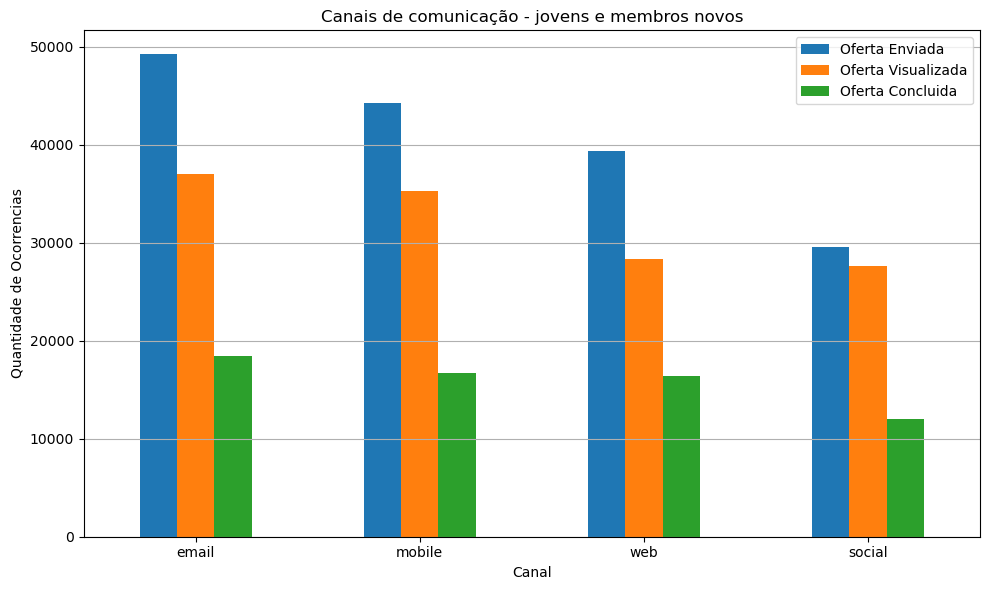

In [26]:
contagem_env = comunicacaoenv.value_counts()
contagem_visu = comunicacaovisu.value_counts()
contagem_conc = comunicacaoconc.value_counts()
canais = pd.DataFrame({'Oferta Enviada': contagem_env,'Oferta Visualizada': contagem_visu,'Oferta Concluida': contagem_conc}).fillna(0).astype(int)

canais.plot(kind='bar', figsize=(10, 6))
plt.title('Canais de comunicação - jovens e membros novos')
plt.xlabel('Canal')
plt.ylabel('Quantidade de Ocorrencias')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

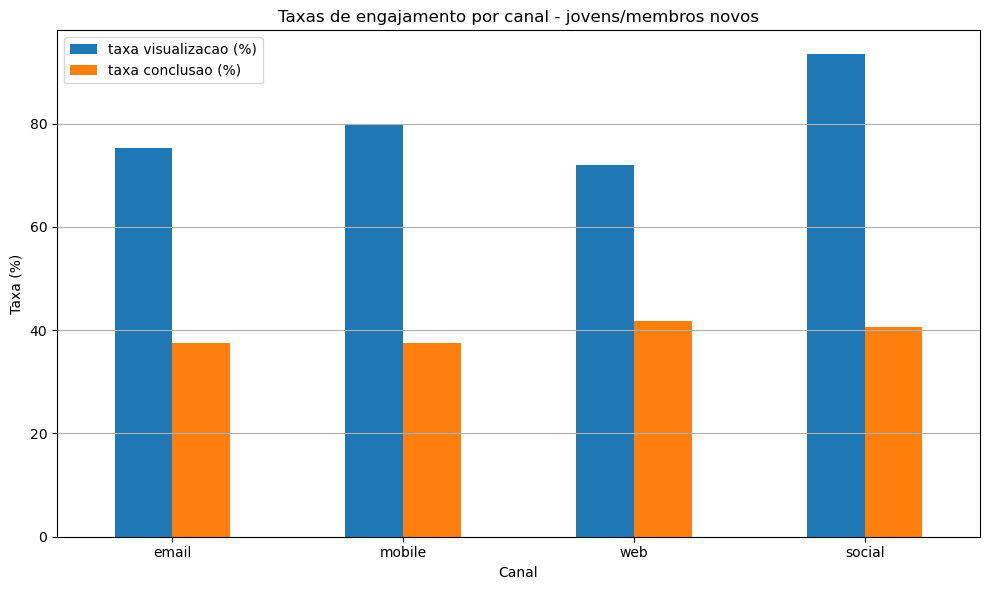

In [14]:

engajamento1 = pd.DataFrame({'enviadas': contagem_env ,'visualizadas': contagem_visu,'concluidas': contagem_conc}).fillna(0)


engajamento1['taxa visualizacao (%)'] = (engajamento1['visualizadas'] / engajamento1['enviadas']) * 100
engajamento1['taxa conclusao (%)'] = (engajamento1['concluidas'] / engajamento1['enviadas']) * 100


engajamento1[['taxa visualizacao (%)', 'taxa conclusao (%)']].plot(kind='bar', figsize=(10, 6))
plt.title("Taxas de engajamento por canal - jovens/membros novos")
plt.ylabel("Taxa (%)")
plt.xlabel("Canal")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [16]:
analisejovensemembrosnovos["oferta"].value_counts()

oferta
compre 1, leve 2    44846
desconto            43194
informativo         16686
Name: count, dtype: int64

In [18]:
ofertaconcluida["id_oferta"].value_counts()

id_oferta
2298d6c36e964ae4a3e7e9706d1fb8c2    2910
fafdcd668e3743c1bb461111dcafc2a4    2852
9b98b8c7a33c4b65b9aebfe6a799e6d9    2450
f19421c1d4aa40978ebb69ca19b0e20d    2408
2906b810c7d4411798c6938adc9daaa5    2172
ae264e3637204a6fb9bb56bc8210ddfd    2040
0b1e1539f2cc45b7b9fa7c272da2e1d7    1833
4d5c57ea9a6940dd891ad53e9dbe8da0    1825
Name: count, dtype: int64

In [20]:
ofertavisualizada["id_oferta"].value_counts()

id_oferta
2298d6c36e964ae4a3e7e9706d1fb8c2    4857
f19421c1d4aa40978ebb69ca19b0e20d    4745
4d5c57ea9a6940dd891ad53e9dbe8da0    4698
fafdcd668e3743c1bb461111dcafc2a4    4663
ae264e3637204a6fb9bb56bc8210ddfd    4347
5a8bc65990b245e5a138643cd4eb9837    4335
9b98b8c7a33c4b65b9aebfe6a799e6d9    2609
3f207df678b143eea3cee63160fa8bed    2563
2906b810c7d4411798c6938adc9daaa5    2512
0b1e1539f2cc45b7b9fa7c272da2e1d7    1691
Name: count, dtype: int64

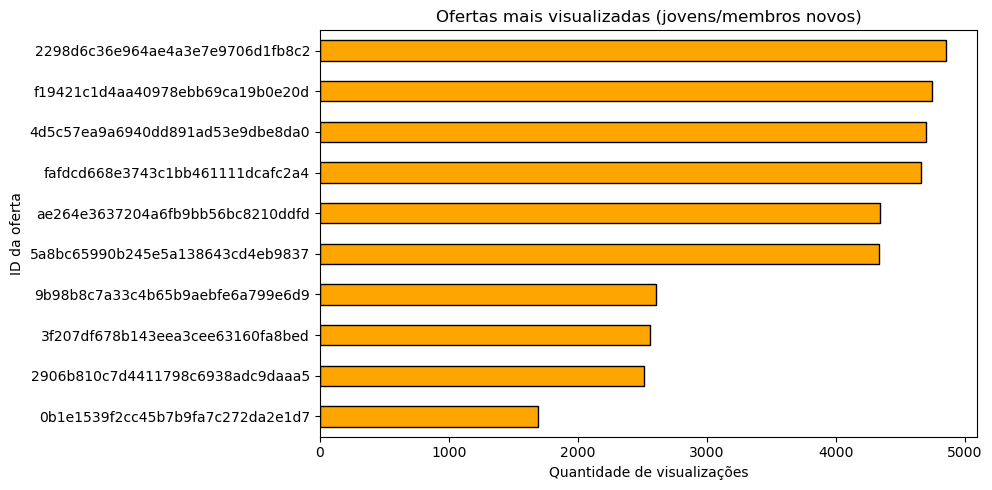

In [22]:
mais_visualizadas = ofertavisualizada["id_oferta"].value_counts()

plt.figure(figsize=(10, 5))
mais_visualizadas.sort_values().plot(kind='barh', color='orange', edgecolor='black')
plt.title("Ofertas mais visualizadas (jovens/membros novos)")
plt.xlabel("Quantidade de visualizações")
plt.ylabel("ID da oferta")
plt.tight_layout()
plt.show()

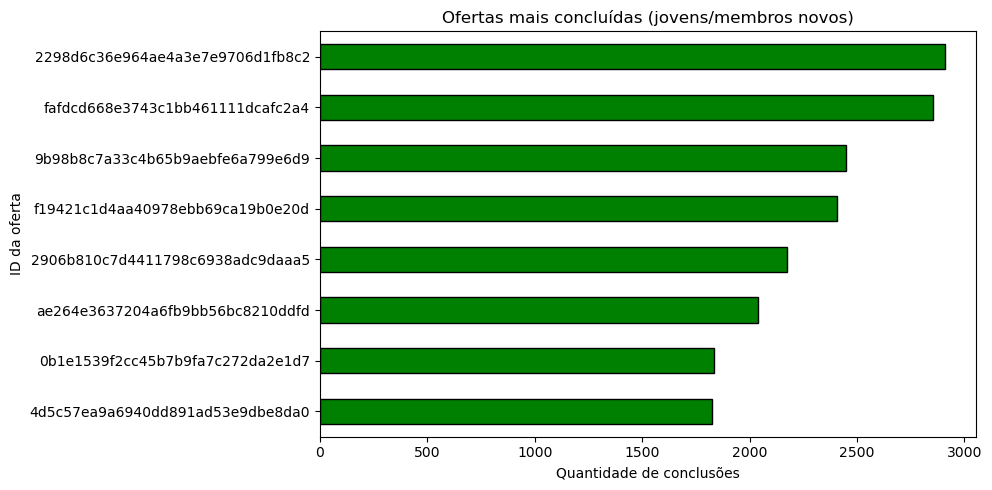

In [68]:
mais_concluidas = ofertaconcluida["id_oferta"].value_counts()

plt.figure(figsize=(10, 5))
mais_concluidas.head(10).sort_values().plot(kind='barh', color='green', edgecolor='black')
plt.title("Ofertas mais concluídas (jovens/membros novos)")
plt.xlabel("Quantidade de conclusões")
plt.ylabel("ID da oferta")
plt.tight_layout()
plt.show()

In [62]:

analiseadultosmembrosint = cliente.loc[((((cliente["renda_anual"]>=50001)&(cliente["renda_anual"]<=70000)) & (cliente["idade"]>=31) & (cliente["idade"]<=50)) | (cliente["membro_desde"]>= pd.to_datetime("2017-01-01")))]
ofertaenv2 = analiseadultosmembrosint.loc[analiseadultosmembrosint["tipo_evento"] == "oferta recebida"]
ofertaconcluida2 = analiseadultosmembrosint.loc[analiseadultosmembrosint["tipo_evento"] == "oferta concluída"]
ofertavisualizada2 = analiseadultosmembrosint.loc[analiseadultosmembrosint["tipo_evento"]== "oferta visualizada"]


canaiscomunicacaoadtememint = analiseadultosmembrosint["canal"].dropna()
canaiscomunicacaoadtememint = canaiscomunicacaoadtememint.str.replace(r"[\[\]' ]", "", regex=True).str.split(",").explode()
canaiscomunicacaoadtememint = canaiscomunicacaoadtememint[canaiscomunicacaoadtememint != ""]
comunicacaoconc2= (ofertaconcluida2["canal"].str.replace(r"[\[\]' ]", "", regex=True).str.split(",").explode())
comunicacaovisu2=(ofertavisualizada2["canal"].str.replace(r"[\[\]' ]", "", regex=True).str.split(",").explode())
comunicacaoenv2= (ofertaenv2["canal"].str.replace(r"[\[\]' ]", "", regex=True).str.split(",").explode())

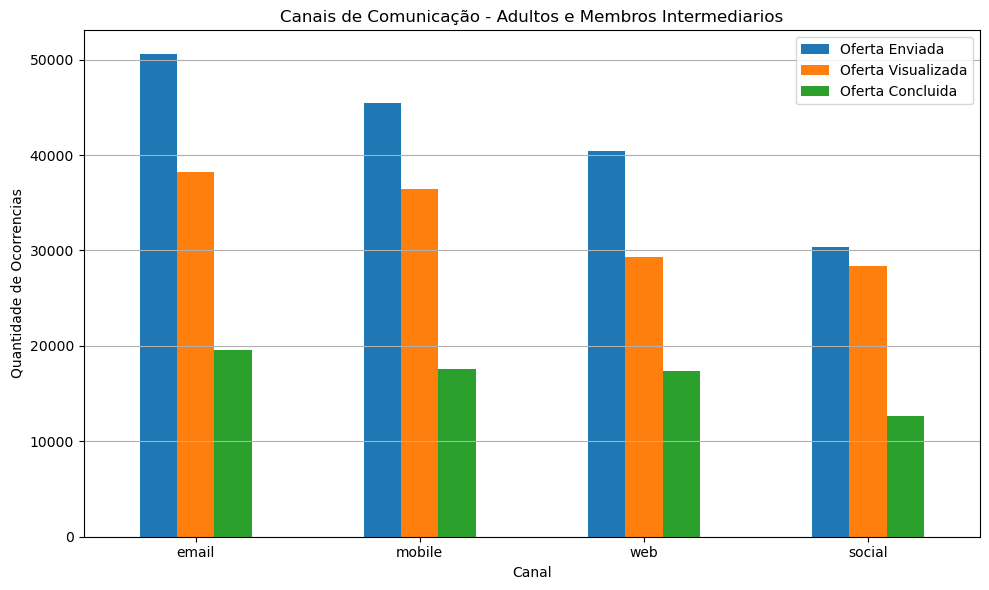

In [63]:
contagem_env2 = comunicacaoenv2.value_counts()
contagem_visu2 = comunicacaovisu2.value_counts()
contagem_conc2 = comunicacaoconc2.value_counts()
canais2 = pd.DataFrame({'Oferta Enviada': contagem_env2,'Oferta Visualizada': contagem_visu2,'Oferta Concluida': contagem_conc2}).fillna(0).astype(int)

canais2.plot(kind='bar', figsize=(10, 6))
plt.title('Canais de Comunicação - Adultos e Membros Intermediarios')
plt.xlabel('Canal')
plt.ylabel('Quantidade de Ocorrencias')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

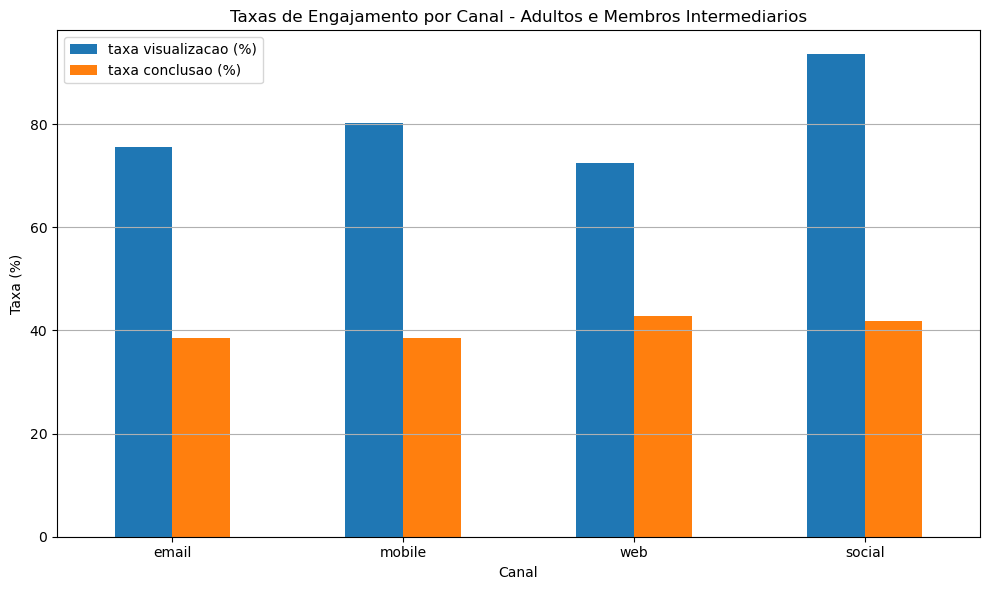

In [95]:

engajamento = pd.DataFrame({'enviadas': contagem_env2 ,'visualizadas': contagem_visu2,'concluidas': contagem_conc2}).fillna(0)


engajamento['taxa visualizacao (%)'] = (engajamento['visualizadas'] / engajamento['enviadas']) * 100
engajamento['taxa conclusao (%)'] = (engajamento['concluidas'] / engajamento['enviadas']) * 100


engajamento[['taxa visualizacao (%)', 'taxa conclusao (%)']].plot(kind='bar', figsize=(10, 6))
plt.title("Taxas de Engajamento por Canal - Adultos e Membros Intermediarios")
plt.ylabel("Taxa (%)")
plt.xlabel("Canal")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

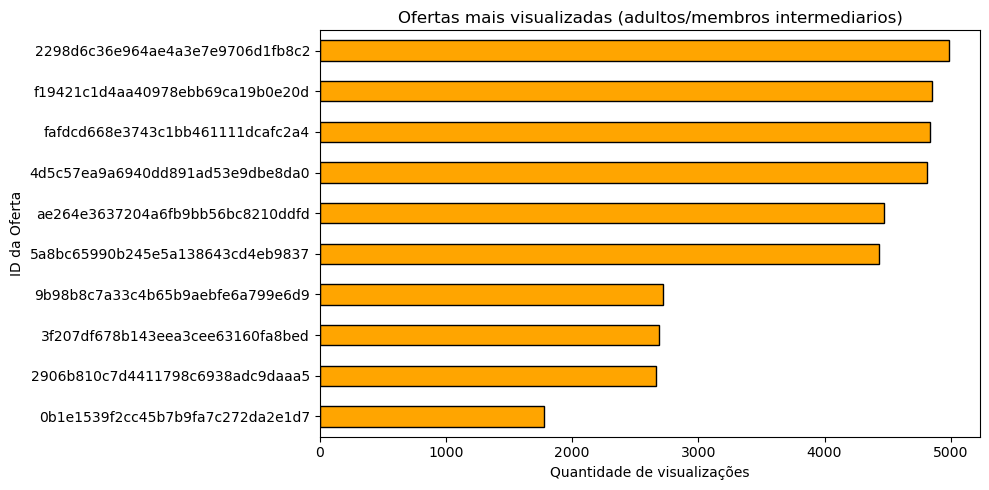

In [60]:
mais_visualizadas2 = ofertavisualizada2["id_oferta"].value_counts()

plt.figure(figsize=(10, 5))
mais_visualizadas2.sort_values().plot(kind='barh', color='orange', edgecolor='black')
plt.title("Ofertas mais visualizadas (adultos/membros intermediarios)")
plt.xlabel("Quantidade de visualizações")
plt.ylabel("ID da Oferta")
plt.tight_layout()
plt.show()

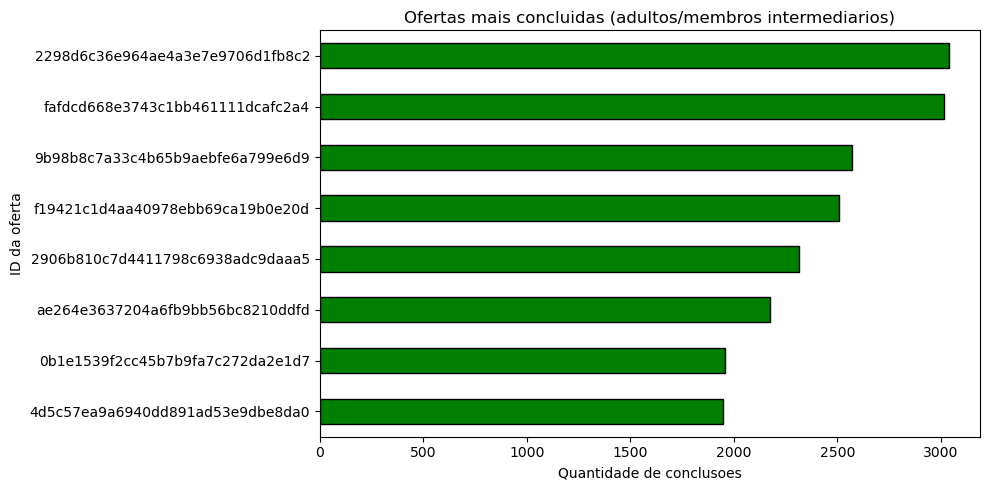

In [40]:
mais_concluidas2 = ofertaconcluida2["id_oferta"].value_counts()

plt.figure(figsize=(10, 5))
mais_concluidas2.head(10).sort_values().plot(kind='barh', color='green', edgecolor='black')
plt.title("Ofertas mais concluidas (adultos/membros intermediarios)")
plt.xlabel("Quantidade de conclusoes")
plt.ylabel("ID da oferta")
plt.tight_layout()
plt.show()

In [115]:

analiseclientesantigos = cliente.loc[(((cliente["renda_anual"]>=60000) & (cliente["idade"]>=51))| ((cliente["membro_desde"]>= pd.to_datetime("2013-01-01")) & (cliente["membro_desde"]<= pd.to_datetime("2016-01-01")))) ]
ofertaenv3 = analiseclientesantigos.loc[analiseclientesantigos["tipo_evento"] == "oferta recebida"]
ofertaconcluida3 = analiseclientesantigos.loc[analiseclientesantigos["tipo_evento"] == "oferta concluída"]
ofertavisualizada3 = analiseclientesantigos.loc[analiseclientesantigos["tipo_evento"]== "oferta visualizada"]

canaiscomunicacaoidososemembant = analiseclientesantigos["canal"].str.replace(r"[\[\]' ]", "", regex=True).str.split(",").explode()
canaiscomunicacaoidososemembant = canaiscomunicacaoidososemembant.str.replace(r"[\[\]' ]", "", regex=True).str.split(",").explode()
canaiscomunicacaoidososemembant = canaiscomunicacaoidososemembant [canaiscomunicacaoidososemembant!= ""]
comunicacaoconc3= (ofertaconcluida3["canal"].str.replace(r"[\[\]' ]", "", regex=True).str.split(",").explode())
comunicacaovisu3=(ofertavisualizada3["canal"].str.replace(r"[\[\]' ]", "", regex=True).str.split(",").explode())
comunicacaoenv3= (ofertaenv3["canal"].str.replace(r"[\[\]' ]", "", regex=True).str.split(",").explode())




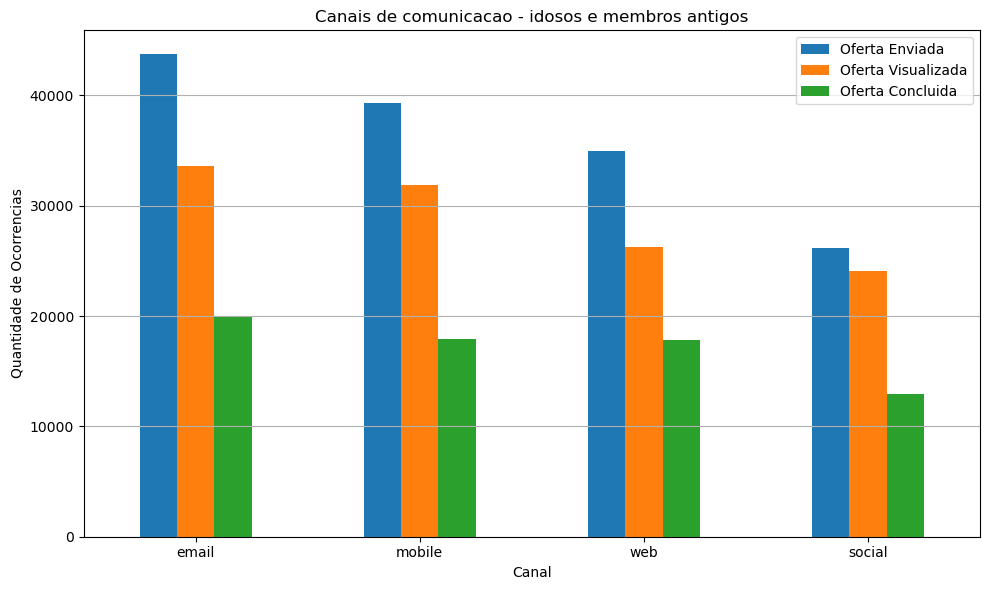

In [117]:
contagem_env3 = comunicacaoenv3.value_counts()
contagem_visu3 = comunicacaovisu3.value_counts()
contagem_conc3 = comunicacaoconc3.value_counts()
canais = pd.DataFrame({'Oferta Enviada': contagem_env3,'Oferta Visualizada': contagem_visu3,'Oferta Concluida': contagem_conc3}).fillna(0).astype(int)

canais.plot(kind='bar', figsize=(10, 6))
plt.title('Canais de comunicacao - idosos e membros antigos')
plt.xlabel('Canal')
plt.ylabel('Quantidade de Ocorrencias')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

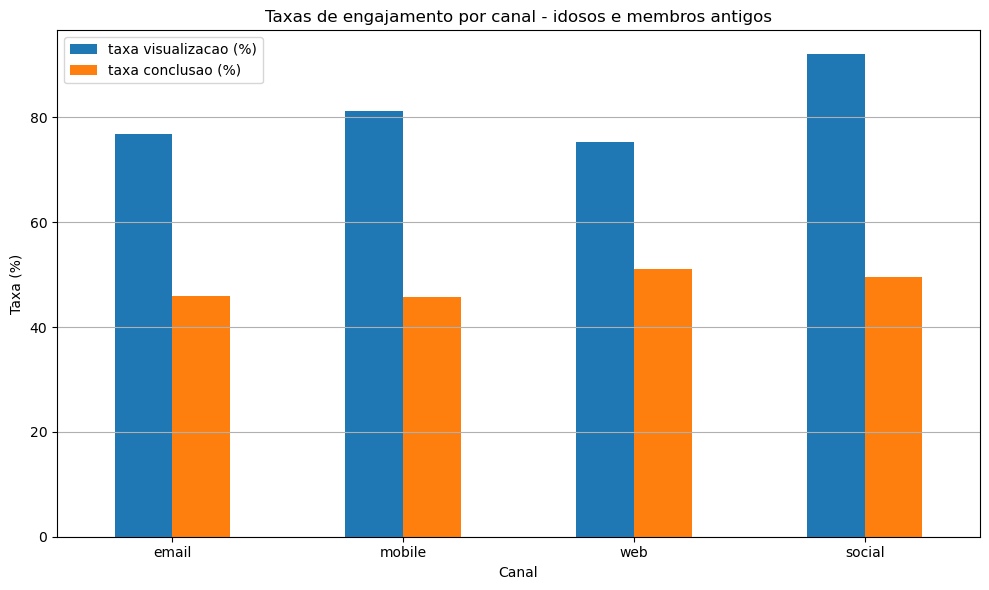

In [119]:
engajamento2 = pd.DataFrame({'enviadas': contagem_env3 ,'visualizadas': contagem_visu3,'concluidas': contagem_conc3}).fillna(0)


engajamento2['taxa visualizacao (%)'] = (engajamento2['visualizadas'] / engajamento2['enviadas']) * 100
engajamento2['taxa conclusao (%)'] = (engajamento2['concluidas'] / engajamento2['enviadas']) * 100


engajamento2[['taxa visualizacao (%)', 'taxa conclusao (%)']].plot(kind='bar', figsize=(10, 6))
plt.title("Taxas de engajamento por canal - idosos e membros antigos")
plt.ylabel("Taxa (%)")
plt.xlabel("Canal")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

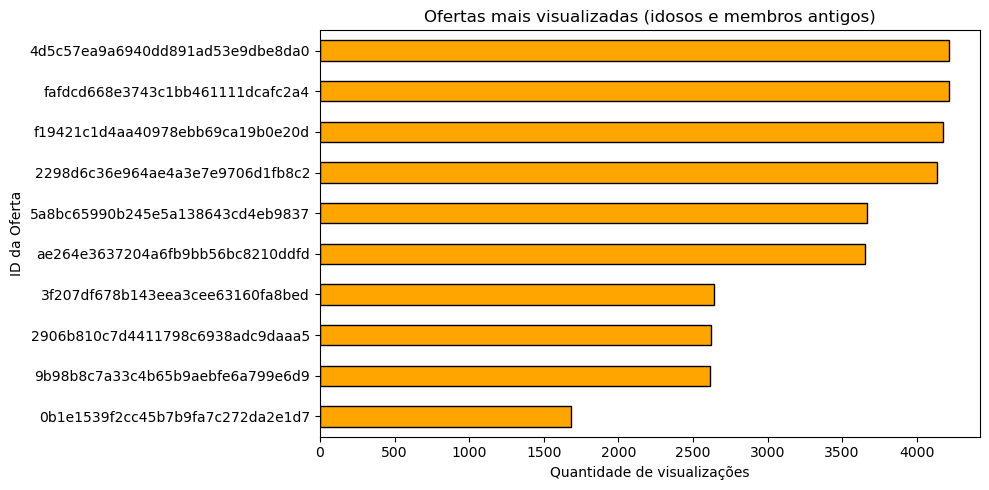

In [121]:
mais_visualizadas3 = ofertavisualizada3["id_oferta"].value_counts()

plt.figure(figsize=(10, 5))
mais_visualizadas3.sort_values().plot(kind='barh', color='orange', edgecolor='black')
plt.title("Ofertas mais visualizadas (idosos e membros antigos)")
plt.xlabel("Quantidade de visualizações")
plt.ylabel("ID da Oferta")
plt.tight_layout()
plt.show()

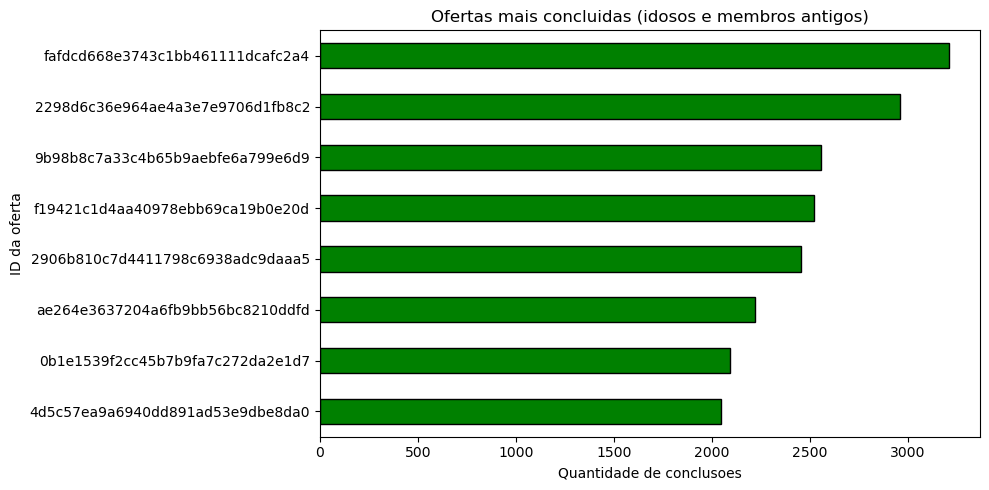

In [125]:
mais_concluidas3 = ofertaconcluida3["id_oferta"].value_counts()

plt.figure(figsize=(10, 5))
mais_concluidas3.head(10).sort_values().plot(kind='barh', color='green', edgecolor='black')
plt.title("Ofertas mais concluidas (idosos e membros antigos)")
plt.xlabel("Quantidade de conclusoes")
plt.ylabel("ID da oferta")
plt.tight_layout()
plt.show()

In [127]:
analiseclientesantigos["valor"].sum()

1119307.57

In [129]:
analiseadultosmembrosint["valor"].sum()


994347.8200000002

In [131]:
analisejovensemembrosnovos["valor"].sum()

938972.8299999998